In [7]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense ,Input,Flatten
from tensorflow.keras.datasets import mnist

In [9]:
inputs = Input((1,))
h1 = Dense(10, activation='relu')(inputs)
h2 = Dense(10, activation='relu')(h1)
h3 = Dense(10, activation='relu')(h2)
h4 = Dense(10, activation='relu')(h3)
h5 = Dense(10, activation='relu')(h4)
output = Dense(1, activation='softmax')(h4)
model = Model(inputs=inputs, outputs=output)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

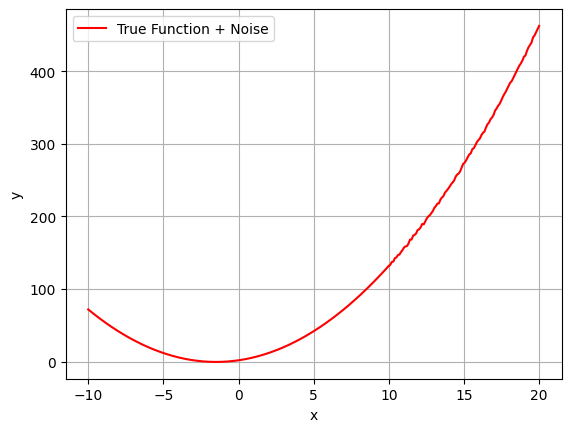

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def y(x):
    return x*x + 3 * x + 2

def yn(x):
    return x*x + 3 * x + 2 + np.random.normal(0, 1, x.shape)

# Generate data
x = np.linspace(-10, 10, 100)
x1 = np.linspace(10, 20, 100)
y_true = y(x)
y_noisy = yn(x1)

# Plot the true + noisy function (just for reference)
plt.plot(np.concatenate((x, x1)), np.concatenate((y_true, y_noisy)), label='True Function + Noise', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
x_train = np.concatenate((x, x1)).reshape(-1, 1)
y_train = np.concatenate((y_true, y_noisy))

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=500, batch_size=32)

# Evaluate
loss = model.evaluate(x_train, y_train)
print(f"Training Loss: {loss}")


Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00  
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00  
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00  
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00  
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00  
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00  
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 -

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


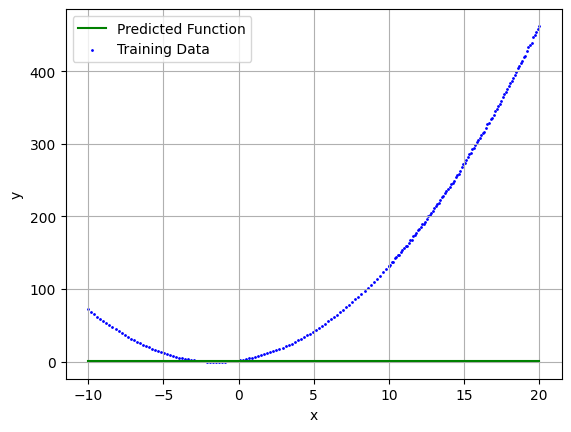

In [15]:
y_pred = model.predict(x_train)

# Sort for smooth plot
sorted_indices = x_train[:, 0].argsort()
x_sorted = x_train[sorted_indices]
y_sorted = y_pred[sorted_indices]

# Plot predictions
plt.plot(x_sorted, y_sorted, label='Predicted Function', color='green')
plt.scatter(x_train, y_train, label='Training Data', color='blue', s=1)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()